In [1]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os import listdir
from os.path import isfile, join

In [2]:
class DataSet:
    def __init__(self, size, vThresh, vHold):
        self.getSize(size)
        self.vThresh = vThresh
        self.vHold = vHold
        self.cycles = list(range(1,len(vThresh) + 1))
        
    def getSize(self, size):
        if size == "50x50 nm$^2$":
            self.size = "delete"
        if size == "80x80 nm$^2$":
            self.size = "50x50 nm$^2$"
        if size == "120x120 nm$^2$":
            self.size = "80x80 nm$^2$"
        if size == "170x170 nm$^2$":
            self.size = "120x120 nm$^2$"
        if size == "220x220 nm$^2$":
            self.size = "170x170 nm$^2$"

In [3]:
filePath = r"C:\Users\Ted Mburu\NbO2\SelectorIV\CompleteData_negative.csv"
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data = df5.values
df5.head()

negativeVoltages = []
negativeSizes = data[1][0].split(",")

for x in range(1, len(negativeSizes)):
    negativeSizes[x] = negativeSizes[x][:-2]
    negativeSizes[x] = negativeSizes[x] + "x" + negativeSizes[x] + r" nm$^2$"
    
uniqueNegSizes = []
for x in range(len(negativeSizes)):
    uniqueNegSizes.append(negativeSizes[x])
uniqueNegSizes = pd.unique(uniqueNegSizes)[1:]

print(uniqueNegSizes)

sizes = [negativeSizes[3], negativeSizes[11], negativeSizes[19], negativeSizes[27], negativeSizes[35]]
vThreshColumns = [3, 11, 19, 27, 35]
vHoldColumns = [7, 15, 23, 31, 39]

for x in range(len(sizes)):
    vThresh = []
    vHold = []
    for y in range(2, 1002):
        rowData = data[y][0].split(",")
        vThresh.append(rowData[vThreshColumns[x]])
        vHold.append(rowData[vHoldColumns[x]])
    negativeVoltages.append(DataSet(sizes[x], np.array(vThresh), np.array(vHold)))
    
uniqueNegSizes = np.delete(uniqueNegSizes, 4)
print(uniqueNegSizes)

['50x50 nm$^2$' '80x80 nm$^2$' '120x120 nm$^2$' '170x170 nm$^2$'
 '220x220 nm$^2$']
['50x50 nm$^2$' '80x80 nm$^2$' '120x120 nm$^2$' '170x170 nm$^2$']


In [4]:
filePath = r"C:\Users\Ted Mburu\NbO2\SelectorIV\CompleteData_positive.csv"
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data = df5.values
df5.head()

positiveVoltages = []
positiveSizes = data[1][0].split(",")

for x in range(len(sizes)):
    vThresh = []
    vHold = []
    for y in range(2, 1002):
        rowData = data[y][0].split(",")
        vThresh.append(rowData[vThreshColumns[x]])
        vHold.append(rowData[vHoldColumns[x]])
    positiveVoltages.append(DataSet(sizes[x], np.array(vThresh), np.array(vHold)))

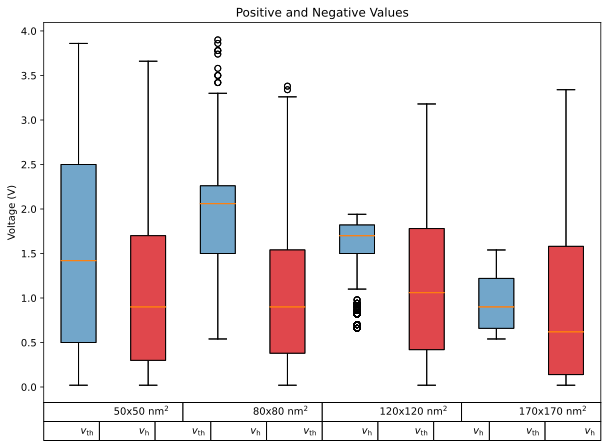

In [5]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
karsensDataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            karsensDataToPlot.append(np.concatenate((negVThresh, posVThresh)))
            karsensDataToPlot.append(np.concatenate((negVHold, posVHold)))
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(karsensDataToPlot[x])
    
    
plt.boxplot(karsensDataToPlot)

title = "Positive and Negative Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(karsensDataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])
holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

# nValues = []
# for x in range(len(negativeVoltages)):
#     nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
# mValues = []
# for x in range(len(negativeVoltages)):
#     mValues.append("m = 100")

# cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

# cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

In [6]:
# this is the folder where the NB02 data is stored on your computer
basePath = r'C:\Users\Ted Mburu\NbO2'

# these functions are used in determining the type
# of data we are looking at (posthesh, neghold etc)
def isIncreasing(L):
    return L[0] < L[len(L) - 1]
def isDecreasing(L):
    return L[0] > L[len(L) - 1]
def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))
def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))
def monotonic(L):
    return non_increasing(L) or non_decreasing(L)
def average(array):
    return sum(array) / len(array)

# this will return the type of data you give it
# it takes an array of voltages and currents as arguments
def sortIntoSide(voltage, current):
    if isIncreasing(voltage) and isIncreasing(current):
        return "posThresh"
    elif isDecreasing(voltage) and isDecreasing(current):
        return "posHold"
    elif isDecreasing(voltage) and isIncreasing(current):
        return "negThresh"
    elif isIncreasing(voltage) and isDecreasing(current):
        return "negHold"
    else: 
        print("???")


# this will take a file name and device size and
# get all of the meaningful stuff out of it
class DataFile:
    def __init__(self, size, fileName):
        self.size = size
        
        if "Sam" in fileName:
            self.version = 2
        else:
            self.version = 1
        
        self.getFileName(fileName) # adds .txt to the file name
        self.getFileDate() # gets the date the data was taken from filename
        self.getSampleNumber() # gets the sample number from filename
        self.getDeviceNumber() # gets the device number from filename
        self.getDoping() # gets the doping percentage from filename
        
        self.NbPercentage = (100 - self.doping) / 100
        self.TiPercentage = self.doping / 100
        self.NbPercentageString = str(self.NbPercentage)
        self.TiPercentageString = str(self.TiPercentage)
        
        # the text displaed on graphs
        sampleText = '  Sample ' + str(self.sampleNumber)
        deviceText = '  Device ' + str(self.deviceNumber)
        nb = 'Nb' if self.NbPercentageString == "1.0" else r'Nb$_{'+ self.NbPercentageString +'}$'
        ti = '' if self.TiPercentageString == "0.0" else r'Ti$_{'+ self.TiPercentageString +'}$'
        self.title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sampleText + deviceText
        
        
        self.filePath = self.getFilePath() # combines the filename and base path to get file path
        self.getData() # reads the file and stores the current, voltage and time
        self.removeBadData() # removes all data before the device is burned through
        self.findAllIndexes() # gets the indexes that begin and end every run
        self.sortRuns() # sorts runs into their types and stores them
        self.getLargestGradients() # finds the index of the largest second derivative in each run
        self.getLargestGradientVoltage() # stores the voltage at the largest second derivative
        self.getLargestGradientCurrent() # stores the current at the largest second derivative
#         self.printData() # prints all the important data
#         self.showFinalGraph() # shows a graph with the important data highlighted

    # adds .txt to the file name
    def getFileName(self, fileName):
        self.fileName = fileName + r'.txt'
    
    # combines the filename and base path to get file path
    def getFilePath(self):
        filePath = ''
        if (self.doping == 5):
            filePath = basePath + r'\Doping05\ '.rstrip()
        elif (self.doping == 10):
            filePath = basePath + r'\Doping10\ '.rstrip()
        else: 
            filePath = basePath + r'\Doping0\ '.rstrip() 
        filePath = filePath + self.fileName
        return filePath
    
    # gets the date the data was taken from filename
    def getFileDate(self):
        if self.version == 1:
            dateMeasured = self.fileName.split("-")[1]
            self.dateMeasuredText = dateMeasured[:2] + '/' + dateMeasured[2:4] + "/" + dateMeasured[4:]
        elif self.version == 2:
            dateMeasured = self.fileName.split("Sam")[1].split("_")[1]
            self.dateMeasuredText = dateMeasured[:2] + '/' + dateMeasured[2:4] + "/20" + dateMeasured[4:]
        self.dateMeasured = dateMeasured
        
    # gets the sample number from filename
    def getSampleNumber(self):
        sampleNumber = self.fileName.split("_")[1].split("-")[0]
        self.sampleNumber = sampleNumber
        
    # gets the doping percentage from filename
    def getDoping(self): 
        # the two versions are the filenames with "Sam" in them and the rest
        if self.version == 1: 
            doping = self.fileName.split("IVNb")[1].split("Ti")[0]
            if doping == "1p00":
                doping = 0
            elif doping == "0p100":
                doping = 0
            elif doping == "0p95":
                doping = 5
            elif doping == "0p90":
                doping = 10
            else: 
                print("???")
        elif self.version == 2:
            doping = self.fileName.split("Ti")[1].split("_")[0]
        else:
            print("version?")
        self.doping = int(doping)
        
    # gets the device number from filename
    def getDeviceNumber(self): 
        if self.version == 1:
            deviceNumber = self.fileName[:-4].split(self.dateMeasured)[1].split("-")[1]
            self.deviceNumber = deviceNumber[1:]
        elif self.version == 2:
            deviceNumber = self.fileName[:-4].split(self.dateMeasured)[1].split("_")[1]
            self.deviceNumber = deviceNumber[1:]
    
    # reads the file and stores the current, voltage and time
    def getData(self):
        df5 = pd.read_csv(self.filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        self.t = data[:,0]
        self.I = data[:,1]
        self.V = data[:,2]
        i = np.abs(np.array(self.I))
        v = np.abs(np.array(self.V))
        r = np.divide(v, i)
        self.R = [x for x in r if np.isnan(x) == False]
    
    # removes all data before the device is burned through
    def removeBadData(self):
        largestCurrent = np.amax(self.I)
        maxCurrentThreshhold = largestCurrent * 0.80
        indexOfFirstLargeCurrent = np.argmax(self.I > maxCurrentThreshhold)

        self.indexOfFirstLargeCurrent = indexOfFirstLargeCurrent

        # print("first index: ", indexOfFirstLargeCurrent)
        # print("first      : ", self.t[indexOfFirstLargeCurrent])
        
        self.t= self.t[indexOfFirstLargeCurrent:]
        self.I= self.I[indexOfFirstLargeCurrent:]
        self.V= self.V[indexOfFirstLargeCurrent:]
        self.R = self.R[indexOfFirstLargeCurrent:]
        self.maxCurrentThreshhold = maxCurrentThreshhold

        # largestCurrent2 = np.amax(self.I)
        # maxCurrentThreshhold2 = largestCurrent2 * 0.80
        # indexOfFirstLargeCurrent2 = np.argmax(self.I > maxCurrentThreshhold)
        
        # self.t= self.t[indexOfFirstLargeCurrent2:]
        # self.I= self.I[indexOfFirstLargeCurrent2:]
        # self.V= self.V[indexOfFirstLargeCurrent2:]
        # self.R = self.R[indexOfFirstLargeCurrent2:]
        # self.maxCurrentThreshhold = maxCurrentThreshhold2
    
    # gets the indexes that begin and end every run
    def findAllIndexes(self):
        allZeroIndexes = []
        zeroIndexes = []
        allMaxIndexes = []
        maxIndexes = []
        newMaxIndexes = []
        allIndexes = []

        # indexes of values that are pretty much 0
        self.zeroThreshhold = 1e-5
        for index, x in enumerate(self.I):
            if x < self.zeroThreshhold:
                allZeroIndexes.append(index)

        # find the zero values that begin or end a run
        zeroIndexes.append(allZeroIndexes[0])
        for x in range(len(allZeroIndexes) - 1):
            if allZeroIndexes[x]+1 != allZeroIndexes[x+1]:
                zeroIndexes.append(allZeroIndexes[x])
                zeroIndexes.append(allZeroIndexes[x+1])
    
        for index, x in enumerate(self.I):
            if x > self.maxCurrentThreshhold:
                allMaxIndexes.append(index)

        # find the max values that start or end a run
        for x in range(len(allMaxIndexes) - 1):
            if allMaxIndexes[x]+1 != allMaxIndexes[x+1]:
                maxIndexes.append(allMaxIndexes[x])
                maxIndexes.append(allMaxIndexes[x+1])
                
        for x in range(len(allMaxIndexes) - 1):
            if allMaxIndexes[x]+1 != allMaxIndexes[x+1]:
                newMaxIndexes.append(allMaxIndexes[x]+1)
                newMaxIndexes.append(allMaxIndexes[x+1]+1)
        
        allIndexes = [*zeroIndexes, *maxIndexes]
        allIndexes = sorted(allIndexes)

        for x in range(3, len(allIndexes) - 1, 4):
            allIndexes[x] = allIndexes[x] + 1

        goodRuns = []
        for x in range(0, len(allIndexes) - 4, 4):
            if monotonic( self.V[allIndexes[x]:allIndexes[x+3]] ):
                goodRuns.append(allIndexes[x])
                goodRuns.append(allIndexes[x+1])
                goodRuns.append(allIndexes[x+2])
                goodRuns.append(allIndexes[x+3])

        allIndexes = np.copy(goodRuns)
        # print("good index 0: ", allIndexes[0])
        # print("good runs  0: ", self.t[allIndexes[0]])
        

        self.goodIndex = self.indexOfFirstLargeCurrent + allIndexes[0]
        # self.t= self.t[self.goodIndex:]
        # self.I= self.I[self.goodIndex:]
        # self.V= self.V[self.goodIndex:]
        # self.R = self.R[self.goodIndex:]

        # allIndexes = [x - allIndexes[0] for x in allIndexes]
        self.allIndexes = allIndexes
        self.zeroIndexes = zeroIndexes
        
    # sorts runs into their types and stores them
    def sortRuns(self):
        posThreshValues = []
        negThreshValues = []
        posHoldValues = []
        negHoldValues = []

        timesToLoop = len(self.zeroIndexes) - 1
        for x in range(0, timesToLoop, 2):
            voltageRun = []
            currentRun = []
            timeRun = []
            secondDerivativeRun = []
            start = self.allIndexes[x]
            stop = self.allIndexes[x+1]
            if x >= self.goodIndex: 
                for y in range(start, stop):
                    voltageRun.append(self.V[y])
                    currentRun.append(self.I[y])
                    timeRun.append(self.t[y])
                    secondDerivativeRun.append(self.I[y])
                if len(currentRun) > 4:
                    secondDerivativeCurrent = np.gradient(np.gradient(currentRun))
                    runType = sortIntoSide(voltageRun, currentRun)
                    currentRun = [ abs(x) for x in currentRun]
                    runData = [timeRun, voltageRun, currentRun, secondDerivativeCurrent]
                    if (runType == "posThresh"):
                        posThreshValues.append(runData)
                    elif (runType == "posHold"):
                        posHoldValues.append(runData)
                    elif (runType == "negThresh"):
                        negThreshValues.append(runData)
                    elif (runType == "negHold"):
                        negHoldValues.append(runData)
        self.posThreshValues = posThreshValues
        self.negThreshValues = negThreshValues
        self.posHoldValues = posHoldValues
        self.negHoldValues = negHoldValues
    
    # finds the index of the largest second derivative in each run
    def getLargestGradients(self):
        # take second derivative of each current array
        posThreshValuesGradients = []
        negThreshValuesGradients = []
        posHoldValuesGradients = []
        negHoldValuesGradients = []

        for x in self.posThreshValues:
            posThreshValuesGradients.append(x[3])
        for x in self.negThreshValues:
            negThreshValuesGradients.append(x[3])
        for x in self.posHoldValues:
            posHoldValuesGradients.append(x[3])
        for x in self.negHoldValues:
            negHoldValuesGradients.append(x[3])
            
        self.posThreshValuesGradients = posThreshValuesGradients
        self.negThreshValuesGradients = negThreshValuesGradients
        self.posHoldValuesGradients = posHoldValuesGradients
        self.negHoldValuesGradients = negHoldValuesGradients

        # find the index of the largest value in the 2nd derivative
        posThreshValuesLargestGradient = []
        negThreshValuesLargestGradient = []
        posHoldValuesLargestGradient = []
        negHoldValuesLargestGradient = []

        for x in posThreshValuesGradients:
            largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
            posThreshValuesLargestGradient.append(largestValue)
        for x in negThreshValuesGradients:
            largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
            negThreshValuesLargestGradient.append(largestValue)
        for x in posHoldValuesGradients:
            largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
            posHoldValuesLargestGradient.append(largestValue)
        for x in negHoldValuesGradients:
            largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
            negHoldValuesLargestGradient.append(largestValue)
            
        self.posThreshValuesLargestGradient = posThreshValuesLargestGradient
        self.negThreshValuesLargestGradient = negThreshValuesLargestGradient
        self.posHoldValuesLargestGradient = posHoldValuesLargestGradient
        self.negHoldValuesLargestGradient = negHoldValuesLargestGradient
    
    # stores the voltage at the largest second derivative
    def getLargestGradientVoltage(self):
        posThreshValuesVoltage = []
        negThreshValuesVoltage = []
        posHoldValuesVoltage = []
        negHoldValuesVoltage = []

        for x in range(len(self.posThreshValuesGradients)):
            voltage = self.posThreshValues[x][1][self.posThreshValuesLargestGradient[x]]
            posThreshValuesVoltage.append(voltage)
        for x in range(len(self.negThreshValuesGradients)):
            voltage = self.negThreshValues[x][1][self.negThreshValuesLargestGradient[x]]
            negThreshValuesVoltage.append(voltage)
        for x in range(len(self.posHoldValuesGradients)):
            voltage = self.posHoldValues[x][1][self.posHoldValuesLargestGradient[x]]
            posHoldValuesVoltage.append(voltage)
        for x in range(len(self.negHoldValuesGradients)):
            voltage = self.negHoldValues[x][1][self.negHoldValuesLargestGradient[x]]
            negHoldValuesVoltage.append(voltage)
        
        self.posThreshValuesVoltage = posThreshValuesVoltage
        self.negThreshValuesVoltage = negThreshValuesVoltage
        self.posHoldValuesVoltage = posHoldValuesVoltage
        self.negHoldValuesVoltage = negHoldValuesVoltage
        
    # stores the current at the largest second derivative
    def getLargestGradientCurrent(self):
        posThreshValuesCurrent = []
        negThreshValuesCurrent = []
        posHoldValuesCurrent = []
        negHoldValuesCurrent = []

        for x in range(len(self.posThreshValuesGradients)):
            current = self.posThreshValues[x][2][self.posThreshValuesLargestGradient[x]]
            posThreshValuesCurrent.append(current)
        for x in range(len(self.negThreshValuesGradients)):
            current = self.negThreshValues[x][2][self.negThreshValuesLargestGradient[x]]
            negThreshValuesCurrent.append(current)
        for x in range(len(self.posHoldValuesGradients)):
            current = self.posHoldValues[x][2][self.posHoldValuesLargestGradient[x]]
            posHoldValuesCurrent.append(current)
        for x in range(len(self.negHoldValuesGradients)):
            current = self.negHoldValues[x][2][self.negHoldValuesLargestGradient[x]]
            negHoldValuesCurrent.append(current)
        
        self.posThreshValuesCurrent = posThreshValuesCurrent
        self.negThreshValuesCurrent = negThreshValuesCurrent
        self.posHoldValuesCurrent = posHoldValuesCurrent
        self.negHoldValuesCurrent = negHoldValuesCurrent
    
    # prints all the important data
    def printData(self):
        averages = []
        averages[0] = average(self.posThreshValuesVoltage)
        averages[1] = average(self.negThreshValuesVoltage)
        averages[2] = average(self.posHoldValuesVoltage)
        averages[3] = average(self.negHoldValuesVoltage)
        
        standardDeviations = []
        standardDeviations[0] = np.std(self.posThreshValuesVoltage)
        standardDeviations[1] = np.std(self.negThreshValuesVoltage)
        standardDeviations[2] = np.std(self.posHoldValuesVoltage)
        standardDeviations[3] = np.std(self.negHoldValuesVoltage)
        
        print("Positive Threshold Voltage: ", averages[0] , "Standard Deviation: ", standardDeviations[0])
        print("Negative Threshold Voltage: ", averages[1], "Standard Deviation: ", standardDeviations[1])
        print("Positive Hold Voltage: ", averages[2], "Standard Deviation: ", standardDeviations[2])
        print("Negative Hold Voltage: ", averages[3], "Standard Deviation: ", standardDeviations[3])
        print()
        
    # shows a graph with the important data highlighted
    def showFinalGraph(self):
        plt.rcParams['figure.figsize'] = (11,6)
        plt.figure(len(files))
        plt.grid()
        plt.semilogy(self.V, self.I)
        plt.xlabel('Voltage (V)');
        plt.ylabel('Current (A)');

        # plt.axhline(y=self.maxCurrentThreshhold, color='r', linestyle='-')
        # plt.axhline(y=self.zeroThreshhold, color='r', linestyle='-')

        plt.axvline(x=0.4, color='r', linestyle='-')
        plt.axvline(x=-0.4, color='r', linestyle='-')

        # if len(self.posThreshValuesVoltage) > 1:
        #     voltage = average(self.posThreshValuesVoltage)
        #     current = average(self.posThreshValuesCurrent)
        #     plt.errorbar(voltage, current, xerr=np.std(self.posThreshValuesVoltage), fmt="ro")

        # if len(self.negThreshValuesVoltage) > 1:
        #     voltage = average(self.negThreshValuesVoltage)
        #     current = average(self.negThreshValuesCurrent)
        #     plt.errorbar(voltage, current, xerr=np.std(self.negThreshValuesVoltage), fmt="bo")

        # if len(self.posHoldValuesVoltage) > 1:
        #     voltage = average(self.posHoldValuesVoltage)
        #     current = average(self.posHoldValuesCurrent)
        #     plt.errorbar(voltage, current, xerr=np.std(self.posHoldValuesVoltage), fmt="go")

        # if len(self.negHoldValuesVoltage) > 1:
        #     voltage = average(self.negHoldValuesVoltage)
        #     current = average(self.negHoldValuesCurrent)
        #     plt.errorbar(voltage, current, xerr=np.std(self.negHoldValuesVoltage), fmt="yo")

        plt.title(self.title);
        plt.show()




In [7]:
files = [] # stores all the files data as DataFile objects

# creating the objects as indices in the files array
#                     size, fileName
# files.append(DataFile("3x3", r'IVs_NbO2_Ti10_Sam13_060622_10a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam13_060622_11b'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam13_060622_12a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_051722_D1'))
# files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_051922_D2'))
# files.append(DataFile("3x3", r'IVs_NbO2_Ti10_Sam24_051922_D3'))
# files.append(DataFile("3x3", r'IVs_NbO2_Ti10_Sam24_051922_D4'))
files.append(DataFile("4x4", r'IVs_NbO2_Ti10_Sam24_051922_D5'))
# files.append(DataFile("20x20", r'IVs_NbO2_Ti10_Sam24_051922_D6'))
# files.append(DataFile("8x8", r'IVs_NbO2_Ti10_Sam24_051922_D7'))
files.append(DataFile("15x15", r'IVs_NbO2_Ti10_Sam24_052022_D8'))
files.append(DataFile("15x15", r'IVs_NbO2_Ti10_Sam24_052022_D9'))
# files.append(DataFile("15x15", r'IVs_NbO2_Ti10_Sam24_060722_D10a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_060722_D12a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_060722_D15a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_052022_D16'))
# files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_052022_D17'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_052022_D18'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_051722_D19'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_051722_D20'))
# files.append(DataFile("3x3", r'IVs_NbO2_Ti10_Sam24_051722_D21'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti10_Sam24_051722_D22'))
files.append(DataFile("15x15", r'IVs_NbO2_Ti0_Sam2_2nd_060122_01a')) # half bad
files.append(DataFile("4x4", r'IVs_NbO2_Ti0_Sam2_2nd_060222_04a'))
# files.append(DataFile("3x3", r'IVs_NbO2_Ti0_Sam2_2nd_060322_06a'))
files.append(DataFile("15x15", r'IVs_NbO2_Ti0_Sam2_2nd_060322_07a')) # half bad
files.append(DataFile("15x15", r'IVs_NbO2_Ti0_Sam2_2nd_060322_08b'))
# files.append(DataFile("15x15", r'IVs_NbO2_Ti0_Sam2_2nd_060322_08a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti0_Sam2_2nd_060322_09a'))
files.append(DataFile("15x15", r'IVs_NbO2_Ti0_Sam2_2nd_060622_12a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti0_Sam2_2nd_060622_13a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti0_Sam2_2nd_060622_14a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti0_Sam2_2nd_060622_15a'))
files.append(DataFile("2x2", r'IVs_NbO2_Ti0_Sam2_2nd_060622_16a'))
files.append(DataFile("4x4", r'IVs_NbO2_Ti0_Sam2_2nd_060622_17a'))
files.append(DataFile("15x15", r'IVs_NbO2_Ti0_Sam2_2nd_060622_18a'))


files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-01b'))
files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-02a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-03a'))
files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-04a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-06a'))
files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-07a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-08a')) # not half bad
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-09a')) # not half bad
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-10a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03222022-11a'))
# files.append(DataFile("15x15", r'IVNb1p00Ti0p00O2_13-03222022-12a'))
files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-13a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-14a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-15b'))
# files.append(DataFile("15x15", r'IVNb1p00Ti0p00O2_13-03242022-16a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-17a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-18a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-19a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-20a'))
# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-21a'))
files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_13-03242022-22a'))


# files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_02-04072022-1a'))
# files.append(DataFile("15x15", r'IVNb1p00Ti0p00O2_02-04072022-02a'))
# files.append(DataFile("15x15", r'IVNb1p00Ti0p00O2_02-04072022-03a'))
files.append(DataFile("2x2", r'IVNb1p00Ti0p00O2_02-04072022-04a'))
files.append(DataFile("2x2", r'IVNb0p100Ti0p00O2_02-04262022-05a'))
# files.append(DataFile("2x2", r'IVNb0p100Ti0p00O2_02-04262022-06a'))
files.append(DataFile("2x2", r'IVNb0p100Ti0p00O2_02-04262022-07a'))
files.append(DataFile("2x2", r'IVNb0p100Ti0p00O2_02-04262022-08'))
files.append(DataFile("2x2", r'IVNb0p100Ti0p00O2_02-04262022-11'))
files.append(DataFile("2x2", r'IVNb0p100Ti0p00O2_02-04282022-22'))
# files.append(DataFile("15x15", r'IVNb0p100Ti0p00O2_02-04262022-13'))
# files.append(DataFile("3x3", r'IVNb0p100Ti0p00O2_02-04262022-14'))
# files.append(DataFile("3x3", r'IVNb0p100Ti0p00O2_02-04282022-21'))
files.append(DataFile("4x4", r'IVNb0p100Ti0p00O2_02-04262022-15'))
files.append(DataFile("4x4", r'IVNb0p100Ti0p00O2_02-04262022-16'))

files.append(DataFile("4x4", r'IVNb0p100Ti0p00O2_02-04282022-18a'))
files.append(DataFile("4x4", r'IVNb0p100Ti0p00O2_02-04282022-19'))
# files.append(DataFile("10x10", r'IVNb0p100Ti0p00O2_02-04262022-17'))
files.append(DataFile("15x15", r'IVNb0p100Ti0p00O2_02-04282022-20')) # half bad 


files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02112022-05-a'))
# files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02112022-06-a'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-07-b'))
# files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-07-c'))
# files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-07-d'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-07-f'))
# files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-08-a'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-08-aa'))
# files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-09-e'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-09-h'))
# files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-02182022-09-i'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-03212022-9'))
# files.append(DataFile("5x5", r'IVNb0p95Ti0p05O2_13-02182022-10-b'))
# files.append(DataFile("15x15", r'IVNb0p95Ti0p05O2_13-03212022-13'))
files.append(DataFile("15x15", r'IVNb0p95Ti0p05O2_13-03212022-14'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-03212022-16'))
files.append(DataFile("2x2", r'IVNb0p95Ti0p05O2_13-03212022-17'))



# files.append(DataFile("2x2", r''))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071322_2x"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071322_3"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_4"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_5")) # half bad
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_6")) # half bad
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_7"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_8"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_9"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_10")) # half bad
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam3_071422_11"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_12"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_13"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_14")) # half bad
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_15"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_16"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071422_17"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam3_071422_18a"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam3_071422_19"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam3_071422_20"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam3_071422_21"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam3_071422_22"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_1")) # half bad
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_2"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_3")) # half bad
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_4"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_5"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_6")) # half bad
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_7")) # half bad
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_8"))
# files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam12_071522_9"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam12_071522_10"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam12_071522_12"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam12_071522_13"))
# files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam12_071822_11"))
files.append(DataFile("4x4", r"IVs_NbO2_Ti0_Sam12_071822_14"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071322_1"))
files.append(DataFile("15x15", r"IVs_NbO2_Ti0_Sam3_071322_2"))


c:\Users\Ted Mburu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-6-a058e8f4a02a>:153: RuntimeWarning: invalid value encountered in greater
  indexOfFirstLargeCurrent = np.argmax(self.I > maxCurrentThreshhold)


In [8]:
# goes through all the DataFiles and stores the first occurance of each new size
allSizes = []
for x in range(len(files)):
    allSizes.append(files[x].size)
allSizes = pd.unique(allSizes)

# gets the number before the "x" in the device size so they can be sorted
newAllSizes = []
for size in allSizes:
    newAllSizes.append(int(size.split("x")[0]))
newAllSizes.sort()

allSizes = []

for size in newAllSizes:
    allSizes.append(str(size) + "x" + str(size))

print(allSizes)

# goes through all the DataFiles and stores the first occurance of each new doping amount
# they're sorted by default 
allDoping= []
for x in range(len(files)):
    allDoping.append(files[x].doping)
allDoping = np.unique(allDoping)
print(allDoping)

['2x2', '4x4', '15x15']
[ 0  5 10]


In [9]:
data = []
mValues = []

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
        if negativeVoltages[x].size == size:
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            data.append(posVThresh)
            mValues.append("m = " + str(10))
for size in allSizes:
    threshVoltage = []
    holdVoltage = []
    for file in files:
        if file.size == size and file.doping == 0:
            # combines the neg and pos thesh and hold voltages and makes them positive 
            threshVoltageArray = np.concatenate((file.posThreshValuesVoltage, file.negThreshValuesVoltage), axis=0)
            threshVoltageArray = np.absolute(threshVoltageArray)
            threshVoltage = np.append(threshVoltage, threshVoltageArray)

    data.append(threshVoltage)

sizesOnGraph = []
for x in range(len(allSizes)):
    sizesOnGraph.append(allSizes[x] + r" $\mu$m$^2$")
print(sizesOnGraph)

['2x2 $\\mu$m$^2$', '4x4 $\\mu$m$^2$', '15x15 $\\mu$m$^2$']


In [10]:
m2x2 = 0
m4x4 = 0
m15x15 = 0

n2x2 = 0
n4x4 = 0
n15x15 = 0

# print(allSizes)

for x in files:
    if "2x2" in x.size and x.doping == 0:
        m2x2 += 1
        n2x2 += round(len(x.zeroIndexes) / 2)
    if "4x4" in x.size and x.doping == 0:
        m4x4 += 1
        n4x4 += round(len(x.zeroIndexes) / 2)
    if "15x15" in x.size and x.doping == 0:
        m15x15 += 1
        n15x15 += round(len(x.zeroIndexes) / 2)
     
print(m2x2, m4x4, m15x15)
print(n2x2, n4x4, n15x15)

mValues.append("m = " + str(m2x2))
mValues.append("m = " + str(m4x4))
mValues.append("m = " + str(m15x15))


17 16 17
1314 1488 1692


{(0, 0): <matplotlib.table.CustomCell object at 0x0000023FE3E20160>, (0, 1): <matplotlib.table.CustomCell object at 0x0000023FE63D4B20>, (0, 2): <matplotlib.table.CustomCell object at 0x0000023FE63F6910>, (0, 3): <matplotlib.table.CustomCell object at 0x0000023FE63F6A30>, (0, 4): <matplotlib.table.CustomCell object at 0x0000023FE63F6B50>, (0, 5): <matplotlib.table.CustomCell object at 0x0000023FE63F6C70>, (0, 6): <matplotlib.table.CustomCell object at 0x0000023FE63F6D90>}


c:\Users\Ted Mburu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


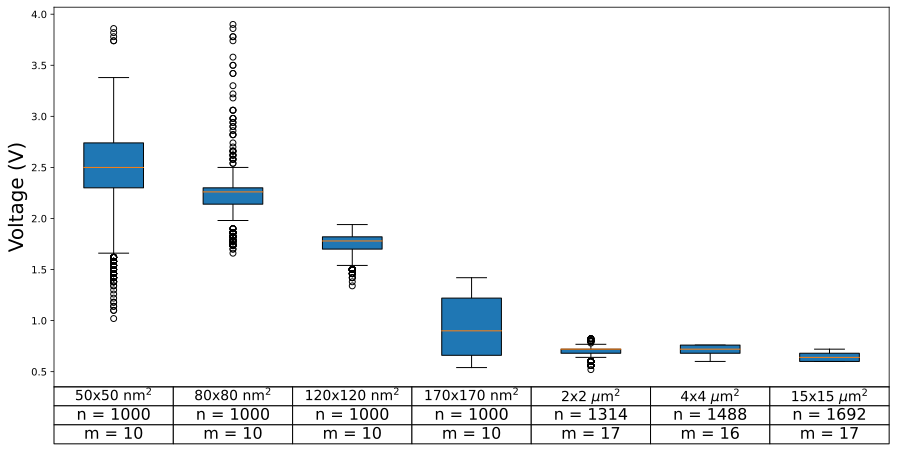

In [11]:
# creates the box and whisker plot
fig, ax = plt.subplots(figsize =(15, 7))
 
# Creating plot
title = "All Data, All Sizes, 0 Doping, Vth"
# ax.set_title(title)
ax.set_ylabel('Voltage (V)', fontsize=20)
font = {'size': 16 }
matplotlib.rc('font', **font)

box = plt.boxplot(data, patch_artist=True)

sizesInTable = [np.concatenate((uniqueNegSizes, np.array(sizesOnGraph)))]
cell_text = sizesInTable
the_table = plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])

nValues = []
for x in range(len(data)):
    nValues.append("n = " + str(len(data[x])))
nValues[4] = "n = " + str(n2x2)
nValues[5] = "n = " + str(n4x4)
nValues[6] = "n = " + str(n15x15)

# print(n2x2, n4x4, n15x15)

cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4], nValues[5], nValues[6] ]]
the_table3 = plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])


cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4], mValues[5], mValues[6] ]]
the_table4 = plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

cells = the_table.properties()["celld"]
print(cells)
for i in range(0, 7):
    cells[0, i]._loc = 'center'
    
# cells = the_table2.properties()["celld"]
# for i in range(0, 6):
#     cells[0, i]._loc = 'center'

cells = the_table3.properties()["celld"]
for i in range(0, 7):
    cells[0, i]._loc = 'center'

cells = the_table4.properties()["celld"]
for i in range(0, 7):
    cells[0, i]._loc = 'center'

plt.xticks([])
# show plot
plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


# 50 data taken out, everything else shifts
# our data, we use 2x2 4x4 15x15, only use 0% doping
# talk to alex about 15 or 20 data
# resistance graphs, no green boxes, only look at or around 0.4 V


In [12]:
print("vth data")

for x in range(len(data)):
    pointsArray = np.array(data[x])
    meanValue = np.mean(pointsArray)
    meanValueStd = np.std(pointsArray)
    meanValueStdOfMean = meanValueStd / np.sqrt(len(pointsArray))
    print(meanValue, " +- ", meanValueStdOfMean)

# xPos = allSizesList[x] * 1e12
# pointsArray = np.array(pointsToPlot[x])
# yPos = np.mean(pointsArray) / 1000
# yStd = np.std(pointsArray) /1000
# yStdOfMean = yStd / np.sqrt(len(pointsArray))

data = []
mValues = []

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
        if negativeVoltages[x].size == size:
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            data.append(posVHold)
            mValues.append("m = " + str(10))
for size in allSizes:
    holdVoltage = []
    for file in files:
        if file.size == size and file.doping == 0:
            # combines the neg and pos thesh and hold voltages and makes them positive 
            holdVoltageArray = np.concatenate((file.posHoldValuesVoltage, file.negHoldValuesVoltage), axis=0)
            holdVoltageArray = np.absolute(holdVoltageArray)
            holdVoltage = np.append(holdVoltage, holdVoltageArray)

    data.append(holdVoltage)


print("vho data")

for x in range(len(data)):
    pointsArray = np.array(data[x])
    meanValue = np.mean(pointsArray)
    meanValueStd = np.std(pointsArray)
    meanValueStdOfMean = meanValueStd / np.sqrt(len(pointsArray))
    print(meanValue, " +- ", meanValueStdOfMean)

vth data
2.4381999999999997  +-  0.015237741302437184
2.2302799999999996  +-  0.00791120228536725
1.7347599999999999  +-  0.0035866059722249946
0.93076  +-  0.008726019848705364
0.6912817679558011  +-  0.0032703323784883725
0.7004347826086955  +-  0.004181482385126717
0.6429629629629631  +-  0.0037296757400402314
vho data
1.08996  +-  0.025164355711998668
0.91152  +-  0.021294470869218613
1.15104  +-  0.023302388684424608
0.772  +-  0.02870740670976743
0.694220994475138  +-  0.0035518527919330967
0.6981215469613258  +-  0.004733879258210889
0.6641509433962265  +-  0.005192739276955754


In [13]:
# this is the data that will be plotted
data = []

mValues = []

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
        if negativeVoltages[x].size == size:
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)

            data.append(posVThresh)
            data.append(posVHold)
            mValues.append("m = " + str(10))
            mValues.append("m = " + str(10))

# go though all the files sizes and the unique, sorted device sizes and 
# if they match, add them to their index in data to be plotted
for size in allSizes:
    threshVoltage = []
    holdVoltage = []
    for file in files:
        if file.size == size and file.doping == 0:
            # combines the neg and pos thesh and hold voltages and makes them positive 
            threshVoltageArray = np.concatenate((file.posThreshValuesVoltage, file.negThreshValuesVoltage), axis=0)
            threshVoltageArray = np.absolute(threshVoltageArray)
            threshVoltage = np.append(threshVoltage, threshVoltageArray)
            
            holdVoltageArray = np.concatenate((file.posHoldValuesVoltage, file.negHoldValuesVoltage), axis=0)
            holdVoltageArray = np.absolute(holdVoltageArray)
            holdVoltage = np.append(holdVoltage, holdVoltageArray)

    data.append(threshVoltage)
    data.append(holdVoltage)
    mValues.append("m = " + str(len(threshVoltage)))
    mValues.append("m = " + str(len(holdVoltage)))

for x in range(len(allSizes)):
    allSizes[x] = allSizes[x] + r" $\mu$m$^2$"

{(0, 0): <matplotlib.table.CustomCell object at 0x0000023FE6451C10>, (0, 1): <matplotlib.table.CustomCell object at 0x0000023FE77D82B0>, (0, 2): <matplotlib.table.CustomCell object at 0x0000023FE77F2220>, (0, 3): <matplotlib.table.CustomCell object at 0x0000023FE77F2340>, (0, 4): <matplotlib.table.CustomCell object at 0x0000023FE77F2460>, (0, 5): <matplotlib.table.CustomCell object at 0x0000023FE77F2580>, (0, 6): <matplotlib.table.CustomCell object at 0x0000023FE77F26A0>}


c:\Users\Ted Mburu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


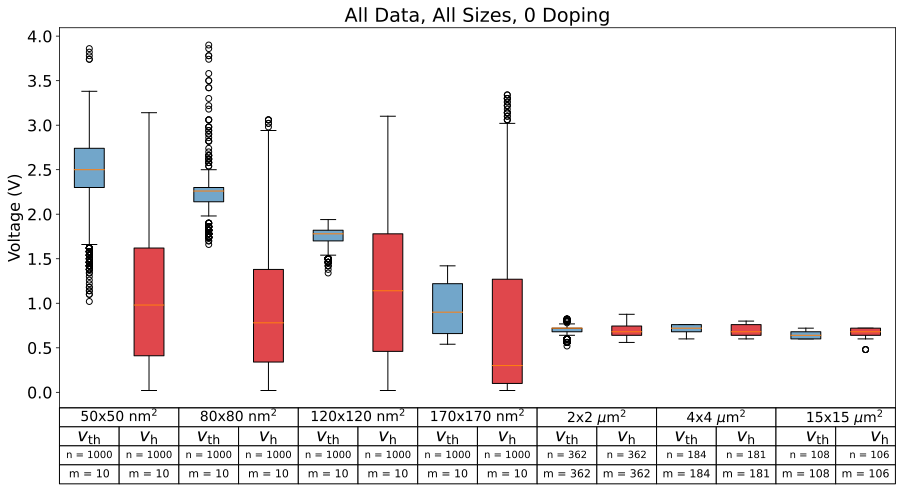

In [14]:
# creates the box and whisker plot
fig, ax = plt.subplots(figsize =(15, 7))
 
# Creating plot
title = "All Data, All Sizes, 0 Doping"
ax.set_title(title)
ax.set_ylabel('Voltage (V)', fontsize=16)
font = {'size': 18 }
matplotlib.rc('font', **font)

# finalDataToPlot = np.concatenate((karsensDataToPlot, data), axis=0)
box = plt.boxplot(data, patch_artist=True)

# colors for the plot in rgb
# values must be between 0 and 1
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# create text labels for the table at the bottom

sizesInTable = [np.concatenate((uniqueNegSizes, np.array(allSizes)))]
cell_text = sizesInTable
the_table = plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])
holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText,treshText, holdText,treshText, holdText,treshText, holdText,treshText, holdText,treshText, holdText,treshText, holdText]]
the_table2 = plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

nValues = []
for x in range(len(data)):
    nValues.append("n = " + str(len(data[x])))

cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4], nValues[5], nValues[6], nValues[7], nValues[8], nValues[9], nValues[10], nValues[11], nValues[12], nValues[13] ]]
the_table3 = plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])


cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4], mValues[5], mValues[6], mValues[7], mValues[8], mValues[9], mValues[10], mValues[11], mValues[12], mValues[13]]]
the_table4 = plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

cells = the_table.properties()["celld"]
print(cells)
for i in range(0, 6):
    cells[0, i]._loc = 'center'
    
cells = the_table2.properties()["celld"]
for i in range(0, 12):
    cells[0, i]._loc = 'center'

cells = the_table3.properties()["celld"]
for i in range(0, 12):
    cells[0, i]._loc = 'center'

cells = the_table4.properties()["celld"]
for i in range(0, 12):
    cells[0, i]._loc = 'center'

plt.xticks([])
# show plot
plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


# 50 data taken out, everything else shifts
# our data, we use 2x2 4x4 15x15, only use 0% doping
# talk to alex about 15 or 20 data
# resistance graphs, no green boxes, only look at or around 0.4 V


In [15]:
voltageToAnalyse = 0.4
voltageRange = 0.05

minVoltage = voltageToAnalyse - voltageRange
maxVoltage = voltageToAnalyse + voltageRange

resistanceData = []
resistanceDataSizes = []

asdf = 0
for size in allSizes:
    resistancesForSize = []
    for y in range(len(files)):
        if files[y].size + " $\mu$m$^2$" == size and files[y].doping == 0:
            for x in range(len(files[y].V)):
                # print(files[y].t[x], files[y].t[files[y].goodIndex])
                # print(type(files[y].t[x]))
                if isinstance(files[y].t[x], float):
                    if  files[y].V[x] >= minVoltage and files[y].V[x] <= maxVoltage and files[y].t[x] - 10 > files[y].t[files[y].goodIndex]:
                        if files[y].R[x] < 10000:
                            resistancesForSize.append(files[y].R[x])
                    # if files[y].R[x] > 30000 and asdf < 20:
                        # files[y].showFinalGraph()
                        # print(files[y].fileName)
                        # print(files[y].size)
                        # asdf += 1
    resistanceData.append(resistancesForSize)
    resistanceDataSizes.append(size)

print(len(resistanceData))
# print((resistanceData[0]))
# print((resistanceData[1]))
# print((resistanceData[2]))

3


{(0, 0): <matplotlib.table.CustomCell object at 0x0000023FE1CF1130>, (0, 1): <matplotlib.table.CustomCell object at 0x0000023FE796F550>, (0, 2): <matplotlib.table.CustomCell object at 0x0000023FE7C08550>}


c:\Users\Ted Mburu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


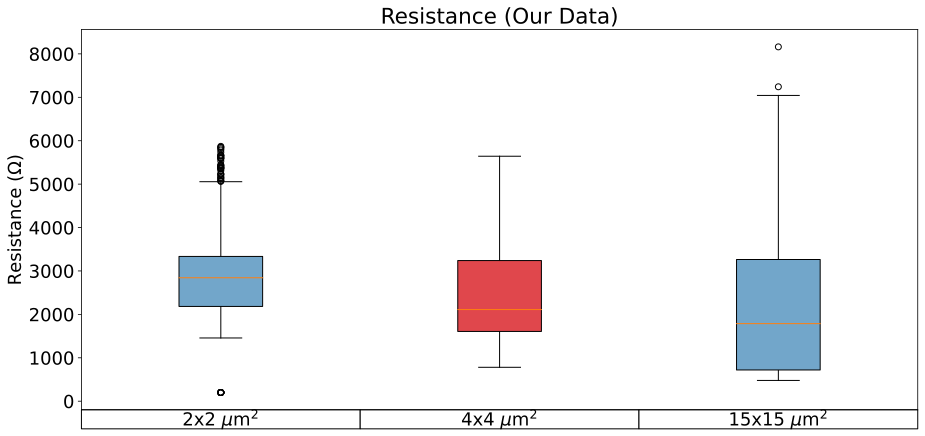

In [16]:
# creates the box and whisker plot
fig, ax = plt.subplots(figsize =(15, 7))
 
# Creating plot
title = "Resistance (Our Data)"
ax.set_title(title)
ax.set_ylabel('Resistance ($\Omega$)')
font = {'size': 18 }
matplotlib.rc('font', **font)

# finalDataToPlot = np.concatenate((karsensDataToPlot, data), axis=0)
box = plt.boxplot(resistanceData, patch_artist=True)

colors = [blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# create text labels for the table at the bottom

sizesInTable = [np.array(allSizes)]
cell_text = sizesInTable
the_table = plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])


cells = the_table.properties()["celld"]
print(cells)
for i in range(0, 3):
    cells[0, i]._loc = 'center'


plt.xticks([])
# show plot
plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


# 50 data taken out, everything else shifts
# our data, we use 2x2 4x4 15x15, only use 0% doping
# talk to alex about 15 or 20 data
# resistance graphs, no green boxes, only look at or around 0.4 V


In [17]:
# look at high resistance IV curves
# everything should be <60,000

mypath = r"C:\Users\Ted Mburu\NbO2\SelectorIV"

voltageToAnalyse = 0.4

class DataAtVoltage:
    def __init__(self, filePath):
        self.filePath = filePath
        self.getSize()
        self.getCurrents()
        self.getResistances()
        self.getData()

    
    def getSize(self):
        size = self.filePath.split("NbO2_")[1].split("_Dev")[0][:-2]
        size = size + r"x" + size + r" nm$^2$"
        self.size = size
        
    def getCurrents(self):      
        df5 = pd.read_csv(self.filePath, names=['Voltage (V)', 'Current (A)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        allData = [float(data[63][0].split(",")[2]), float(data[244][0].split(",")[2])]
        self.currents = allData
        self.sign = "negative" if self.currents[0] < 0 else "positive"
        
    def getData(self):      
        df5 = pd.read_csv(self.filePath, names=['Voltage (V)', 'Current (A)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        allData = data[:,0][54:]
        I= [ele.split(",")[2] for ele in allData]
        V= [ele.split(",")[1] for ele in allData]
        
        self.I= [float(ele) for ele in I]
        self.V= [float(ele) for ele in V]
        
    def getResistances(self): 
        self.resistances = [voltageToAnalyse/self.currents[0], voltageToAnalyse/self.currents[1]]

In [18]:
allFiles = []
for fileName in listdir(mypath):
    fullPath = join(mypath, fileName)
    if isfile(fullPath) and "Selector-IV-sweep" in fileName:
        allFiles.append(DataAtVoltage(fullPath))

In [19]:
karsensSizesResistance = []
for file in allFiles:
    if karsensSizesResistance.count(file.size) == 0:
        karsensSizesResistance.append(file.size)

print(karsensSizesResistance)

['50x50 nm$^2$', '80x80 nm$^2$', '120x120 nm$^2$', '170x170 nm$^2$', '220x220 nm$^2$']


In [20]:
# print(len(allFiles))

karstensResistances = []
for size in karsensSizesResistance:
    resistancesPerSize = []
    for file in allFiles:
        if file.size == size and file.sign == "positive": 
            r1 = abs(file.resistances[0])
            r2 = abs(file.resistances[1])
            if r1 > 0.0001:
                resistancesPerSize.append(r1)
            if r2 > 0.0001:
                resistancesPerSize.append(r2)
    karstensResistances.append(resistancesPerSize)

# print(len(karstensResistances))

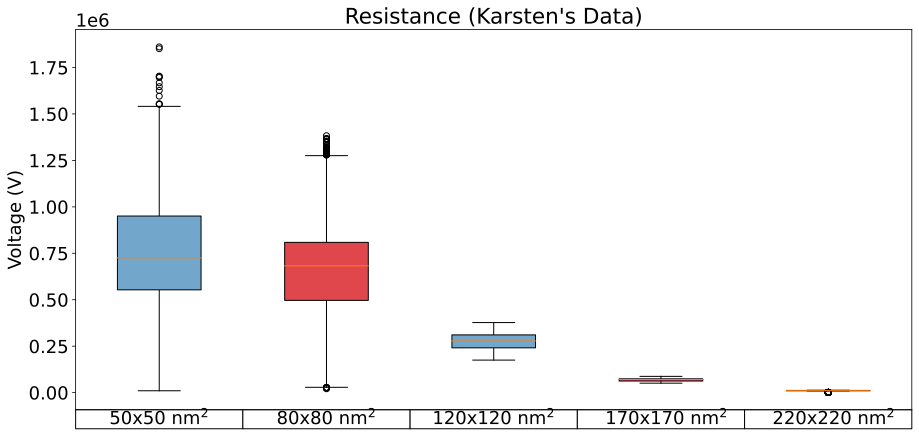

In [21]:
# creates the box and whisker plot
fig, ax = plt.subplots(figsize =(15, 7))
 
# Creating plot
title = "Resistance (Karsten's Data)"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')
font = {'size': 18 }
matplotlib.rc('font', **font)

# finalDataToPlot = np.concatenate((karsensDataToPlot, data), axis=0)
box = plt.boxplot(karstensResistances, patch_artist=True)

red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# create text labels for the table at the bottom

sizesInTable = [np.array(sizes)]
cell_text = sizesInTable
the_table = plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])


cells = the_table.properties()["celld"]
# print(cells)
for i in range(0, 3):
    cells[0, i]._loc = 'center'


plt.xticks([])
# show plot
plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


# 50 data taken out, everything else shifts
# our data, we use 2x2 4x4 15x15, only use 0% doping
# talk to alex about 15 or 20 data
# resistance graphs, no green boxes, only look at or around 0.4 V


In [22]:
# change label
# change unit to kilo ohms 
# box plot in log



finalDataToPlot = []

for x in karstensResistances:
    finalDataToPlot.append(x)
for x in resistanceData:
    finalDataToPlot.append(x)

finalDataToPlot.pop(0)

[569841.1567775483,
 595681.3104988831,
 597059.4820508993,
 603591.3686434284,
 602500.3765627354,
 603318.2503770739,
 605831.1245740249,
 615574.0227762389,
 618620.4763377669,
 610547.2029306266,
 614439.3241167435,
 603227.2658724175,
 606934.2235035279,
 606428.1382656156,
 612838.9765589092,
 624073.6406896014,
 629277.1179108,
 622907.4203846453,
 624219.7253433209,
 611153.5523300229,
 613026.8199233717,
 609570.2529716551,
 611246.9437652811,
 612416.7495981015,
 616285.3401124722,
 624853.5499492306,
 631662.0607974733,
 636587.8889154134,
 642983.4431763382,
 628239.3591958537,
 632261.1238441477,
 641128.3859592885,
 645682.0016142051,
 629376.1309102352,
 631811.720107408,
 582029.8290287377,
 587932.6817079445,
 600150.0375093773,
 602999.9246250095,
 621214.4742972512,
 625439.7623328904,
 616760.4656541516,
 620876.9887466046,
 631064.1318924036,
 633914.4215530904,
 641077.0093757514,
 646673.6722981166,
 650512.2784192552,
 653915.3179663233,
 656437.187166653,
 6648

c:\Users\Ted Mburu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{(0, 0): <matplotlib.table.CustomCell object at 0x0000023FEB046160>, (0, 1): <matplotlib.table.CustomCell object at 0x0000023FF236BFD0>, (0, 2): <matplotlib.table.CustomCell object at 0x0000023FF237BC70>, (0, 3): <matplotlib.table.CustomCell object at 0x0000023FF237BD90>, (0, 4): <matplotlib.table.CustomCell object at 0x0000023FF237BEB0>, (0, 5): <matplotlib.table.CustomCell object at 0x0000023FF237BFD0>, (0, 6): <matplotlib.table.CustomCell object at 0x0000023FE7FB1130>}


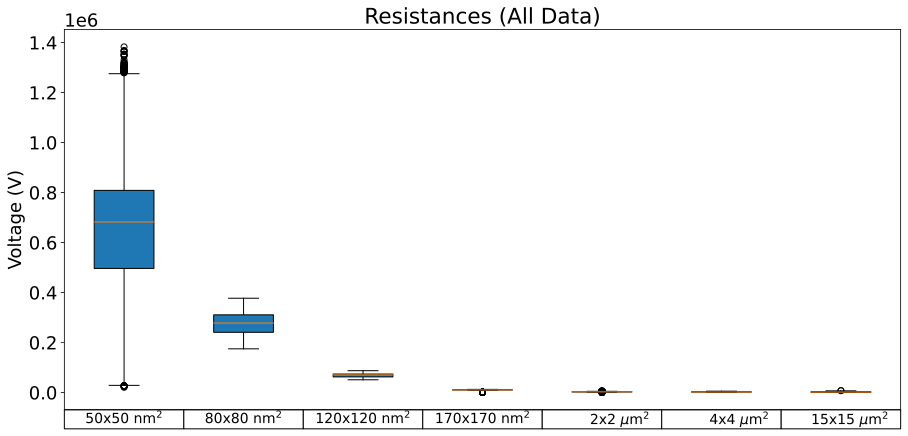

In [23]:
# creates the box and whisker plot
fig, ax = plt.subplots(figsize =(15, 7))
 
# Creating plot
title = "Resistances (All Data)"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')
font = {'size': 18 }
matplotlib.rc('font', **font)

box = plt.boxplot(finalDataToPlot, patch_artist=True)

red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

# colors = [blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red]
 
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)

# create text labels for the table at the bottom

sizesInTable = [np.concatenate((uniqueNegSizes, np.array(allSizes)))]
cell_text = sizesInTable
the_table = plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])


cells = the_table.properties()["celld"]
print(cells)
for i in range(0, 3):
    cells[0, i]._loc = 'center'


plt.xticks([])
# show plot
plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


In [24]:
finalDataToPlotX = []
finalDataToPlotY = []

for file in allFiles:
    number = int(file.size.split("x")[0])
    if "nm" in file.size:
        number *= 1e-9
    else: 
        number *= 1e-6
    number *= number

    finalDataToPlotX.append(number)
    finalDataToPlotY.append(abs(file.resistances[0]))
    finalDataToPlotX.append(number)
    finalDataToPlotY.append(abs(file.resistances[1]))

print(len(finalDataToPlotX))
print(len(finalDataToPlotY))


20000
20000


In [25]:
for x in range(len(resistanceData)):
    for y in range(len(resistanceData[x])):

        number = int(resistanceDataSizes[x].split("x")[0])
        if "nm" in resistanceDataSizes[x]:
            number *= 1e-9
        else: 
            number *= 1e-6
        number *= number
        finalDataToPlotX.append(number)
        finalDataToPlotY.append(abs(resistanceData[x][y]))

print(len(finalDataToPlotX))
print(len(finalDataToPlotY))

28626
28626


In [26]:
print(set(finalDataToPlotX))
maxX = (max(set(finalDataToPlotX)))
minX = (min(set(finalDataToPlotX)))

maxY = max(finalDataToPlotY)
minY = min(finalDataToPlotY)

print("y: ", minY, maxY)
print("x: ", minX, maxX)

{2.5000000000000004e-15, 6.400000000000001e-15, 4e-12, 2.89e-14, 1.6e-11, 4.840000000000001e-14, 1.4400000000000004e-14, 2.2499999999999997e-10}
y:  199.98930057241938 1860897.883228658
x:  2.5000000000000004e-15 2.2499999999999997e-10


In [27]:
fig, ax = plt.subplots(figsize =(15, 7))
title = "Resistance vs Area Scatter (All Data)"
ax.set_title(title)
ax.set_ylabel('log R (ohms)')
ax.set_xlabel('log A (m)')
# font = {'size': 18 }
# matplotlib.rc('font', **font)

plt.scatter(finalDataToPlotX, finalDataToPlotY)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim([1e-15, maxX * 1.5])
plt.ylim([1, maxY * 1.5])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


In [28]:
class ResistanceVsAreaDataPoint:
    def __init__(self, area, resistance):
        self.getArea(area)
        self.resistance = resistance
    
    def getArea(self, area):
        # if area == 2.5000000000000004e-15:
        #     area = 0
        # elif area == 6.400000000000001e-15:
        #     area = 2.5000000000000004e-15
        # elif area == 1.4400000000000004e-14:
        #     area = 6.400000000000001e-15
        # elif area == 0.028900000000000002e-16:
        #     area = 1.4400000000000004e-14
        # elif area == 4.84e-14:
        #     area = 0.028900000000000002e-16
        # else:
        #     area == area
        self.area = area 

print(set(finalDataToPlotX))

resistanceVsAreaDataPoints = []

for x in range(len(finalDataToPlotY)):
    resistanceVsAreaDataPoints.append(ResistanceVsAreaDataPoint(finalDataToPlotX[x], finalDataToPlotY[x]))

print(len(resistanceVsAreaDataPoints))

{2.5000000000000004e-15, 6.400000000000001e-15, 4e-12, 2.89e-14, 1.6e-11, 4.840000000000001e-14, 1.4400000000000004e-14, 2.2499999999999997e-10}
28626


In [29]:
pointsToPlot = []

allSizesList = list(set(finalDataToPlotX))

for x in range(len(allSizesList)):
    averageResistanceAtSize = []
    for y in range(len(resistanceVsAreaDataPoints)):
        if allSizesList[x] == resistanceVsAreaDataPoints[y].area:
            averageResistanceAtSize.append(resistanceVsAreaDataPoints[y].resistance)
    pointsToPlot.append(averageResistanceAtSize)
print(len(pointsToPlot))

maxY = max(finalDataToPlotY)
minY = min(finalDataToPlotY)

print((allSizesList))

8
[2.5000000000000004e-15, 6.400000000000001e-15, 4e-12, 2.89e-14, 1.6e-11, 4.840000000000001e-14, 1.4400000000000004e-14, 2.2499999999999997e-10]


8
[0.0025000000000000005, 0.0064, 4.0, 0.028900000000000002, 16.0, 0.048400000000000006, 0.014400000000000003, 224.99999999999997]
[391.3070704126814, 376.03882240298685, 250.3441307353718, 67.6719107764618, 9.038890603577231, 2.8925855847144475, 2.420597848188492, 2.08081305390719]
[6.797988695705296, 5.877612819549291, 1.2003793243430163, 0.23104248661511165, 0.06410692217505652, 0.014478653055034832, 0.020573986453471957, 0.0257212422658523]


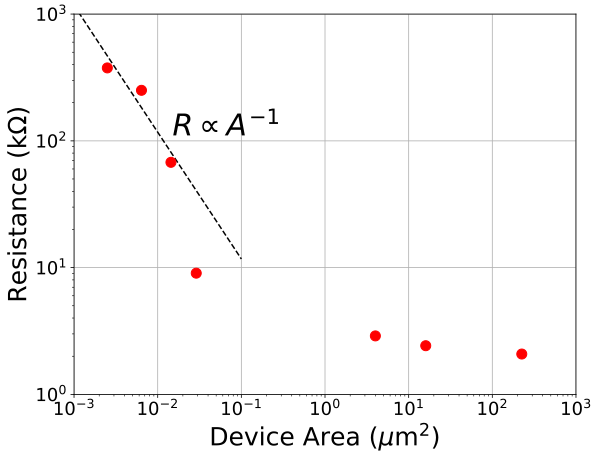

In [36]:
fig, ax = plt.subplots(figsize =(9, 7))
title = "Resistance vs Area (Mean)(All Data) err bars v2"
# ax.set_title(title)
ax.set_ylabel(r'Resistance (k$\Omega$)', fontsize=25)
ax.set_xlabel(r'Device Area ($\mu$m$^2$)', fontsize=25)
# font = {'size': 18 } 
# matplotlib.rc('font', **font)

# plt.scatter(pointsToPlotX, pointsToPlotY)

dataToPlot = []
for x in range(len(pointsToPlot)):
    # xPos = allSizesList[x - 1] * 1e12
    # if x > 3:
    xPos = allSizesList[x] * 1e12

    # if xPos == 0.028900000000000002:
    #     xPos = 0.000000000000001
    # print("len: ", len(pointsToPlot[x]))
    pointsArray = np.array(pointsToPlot[x])
    yPos = np.mean(pointsArray) / 1000
    yStd = np.std(pointsArray) /1000
    yStdOfMean = yStd / np.sqrt(len(pointsArray))
    # print(xPos, yPos)
    dataToPlot.append([xPos, yPos, yStdOfMean])
    # if xPos != 0:
        # plt.errorbar(xPos, yPos, yerr = yStd, marker="o", markersize=10, ecolor="red", markeredgecolor="red", markerfacecolor="red")

print(len(dataToPlot))

# print(dataToPlot[0])
areaList = ([row[0] for row in dataToPlot])
resistanceList = ([row[1] for row in dataToPlot])
stdofmeanlist = ([row[2] for row in dataToPlot])

print(areaList)

resistanceListSort = [x for _,x in sorted(zip(areaList,resistanceList))]
stdofmeanlistSort = [x for _,x in sorted(zip(areaList,stdofmeanlist))]
areaList.sort() 

print(resistanceListSort)
print(stdofmeanlistSort)

areaList.pop(4)

plt.errorbar(areaList, resistanceListSort[1:], ls = 'none', yerr = stdofmeanlistSort[1:], marker="o", markersize=10, ecolor="red", markeredgecolor="red", markerfacecolor="red")

k1 = 3 * 6.5
xPos = np.logspace(-3, -1, 1000)
yPos = np.power(xPos, -0.5) * k1
# plt.plot(xPos, yPos, '--')

k2 = 3 * 0.6 * 0.65
yPos = np.power(xPos, -1) * k2
plt.text(1.5e-2, 1.1e2, r'$R \propto A^{-1}$', fontsize=30)
plt.plot(xPos, yPos, 'k--')

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlim([1e-3, 1e3])
plt.ylim([1, 1000])
# show plot
plt.grid()
# plt.grid(b=True, which='minor', color='b', linestyle='-')
# plt.grid(b=True, which='major', color='r', linestyle='-')
plt.savefig(title + r'.pdf', bbox_inches = 'tight')

plt.show() 
